<a href="https://colab.research.google.com/github/Iddhie/linearregression_diamondprice/blob/main/DiamonPricePredcitionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple code to predict the price of a of diamond by linear regression
------------------------------------------------------------------------

 Here, we use a Kaggle dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/diamonds to train a linear regression model to predict the price of a diamond accurately


###1. First step is to load dataset which is stored in my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
filename = "/content/gdrive/MyDrive/Colab Notebooks/diamonds.csv"
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
#load the dataset and print the dataset
df = pd.read_csv(filename)
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,b'Ideal',b'D',b'SI1',60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,b'Good',b'D',b'SI1',63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,b'Very Good',b'D',b'SI1',62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,b'Premium',b'H',b'SI2',61.0,58.0,2757.0,6.15,6.12,3.74


###2. Next, we will check for nulls in the dataset to clean-up before doing any processing.

In [ ]:
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
'x'        0
'y'        0
'z'        0
dtype: int64


There are no nulls in this dataset. This indicates that it is high quality, easy to use dataset. 

### 3. Next step is to visualizing dataset using SNS plotting tool. This will interpret the data clearly and can help to identify any correlations between the data.

<Figure size 432x288 with 0 Axes>

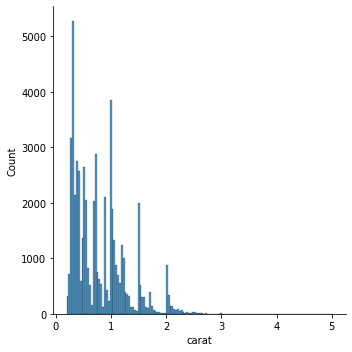

<Figure size 432x288 with 0 Axes>

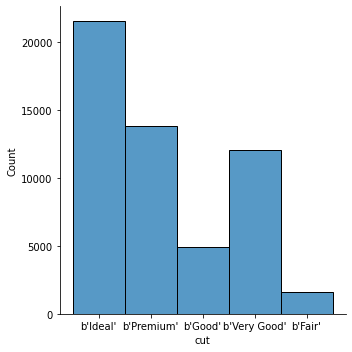

<Figure size 432x288 with 0 Axes>

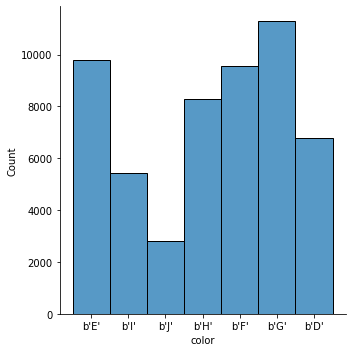

<Figure size 432x288 with 0 Axes>

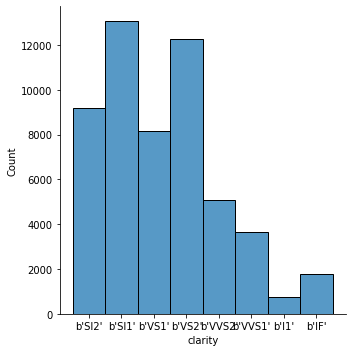

<Figure size 432x288 with 0 Axes>

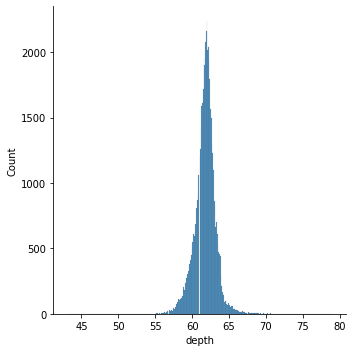

<Figure size 432x288 with 0 Axes>

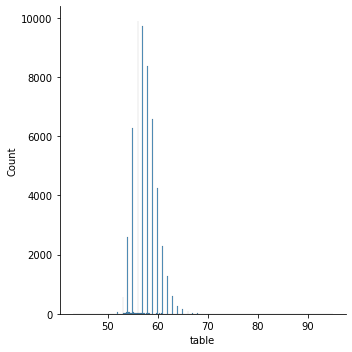

<Figure size 432x288 with 0 Axes>

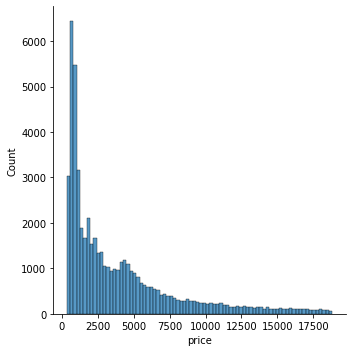

<Figure size 432x288 with 0 Axes>

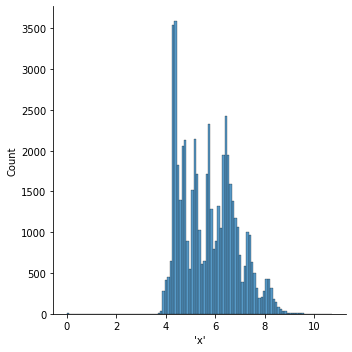

<Figure size 432x288 with 0 Axes>

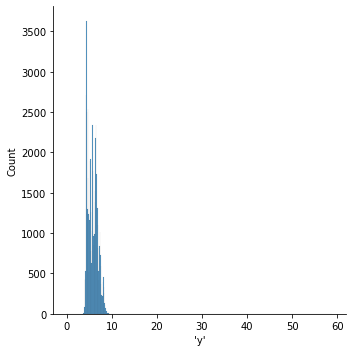

<Figure size 432x288 with 0 Axes>

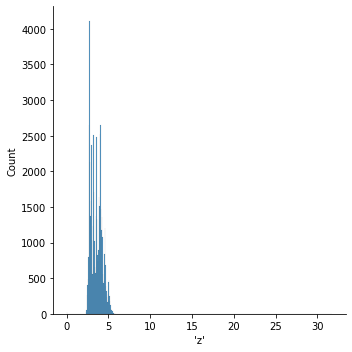

In [ ]:
for column in df.columns:
    plt.figure()
    sns.displot(df, x=column)
    plt.show()

### 4. Next, we use one-hot encoding to turn the non-numerical and non ordinal features to binary type.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['cut','color', 'clarity'])
df_encoded.columns
df_encoded.describe()

,carat,depth,table,price,'x','y','z',cut_b'Fair',cut_b'Good',cut_b'Ideal',...,color_b'I',color_b'J',clarity_b'I1',clarity_b'IF',clarity_b'SI1',clarity_b'SI2',clarity_b'VS1',clarity_b'VS2',clarity_b'VVS1',clarity_b'VVS2'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,...,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.029848,0.090953,0.399537,...,0.100519,0.052058,0.013737,0.033185,0.242214,0.170449,0.151483,0.227253,0.067760,0.093919
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.170169,0.287545,0.489808,...,0.300694,0.222146,0.116400,0.179121,0.428427,0.376030,0.358522,0.419061,0.251337,0.291719
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Further visualising data using a heatmap to show the correlation of each feature to the target feature

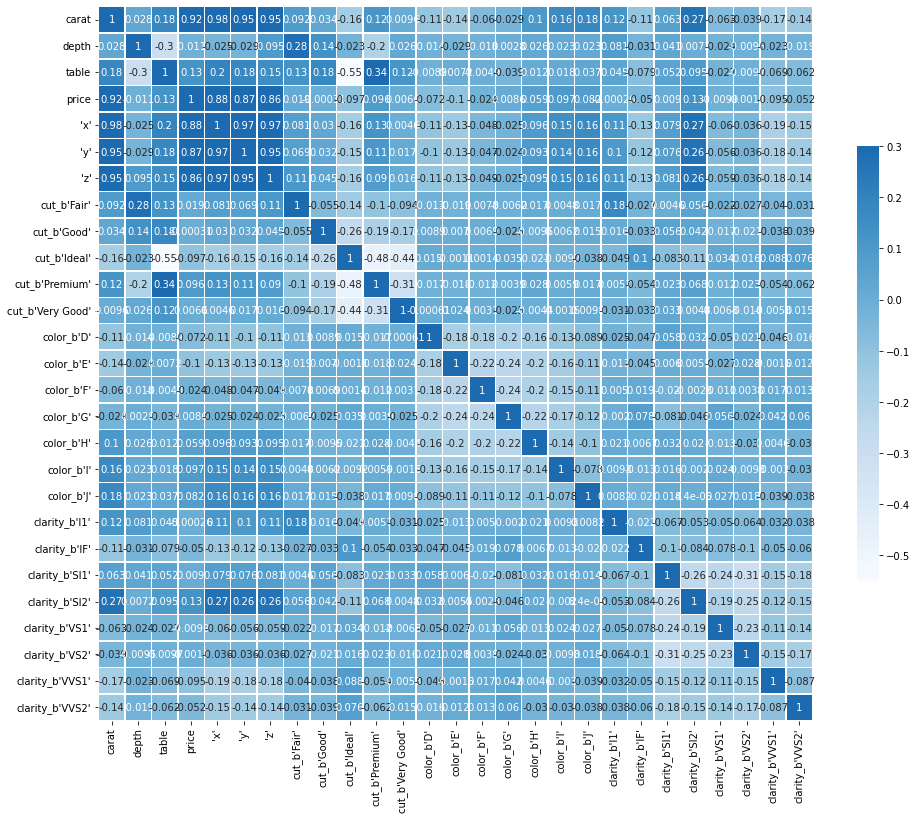

In [ ]:
# Set the figure size
corr = df_encoded.corr()
fig, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap and use blue colors(more appealing visually) and correct aspect ratio
sns.heatmap(corr, cmap='Blues', vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Drop any duplicate rows in the dataset to obtain more accurate results with regression

In [ ]:
df_encoded = df_encoded.drop_duplicates()
df_encoded

,carat,depth,table,price,'x','y','z',cut_b'Fair',cut_b'Good',cut_b'Ideal',...,color_b'I',color_b'J',clarity_b'I1',clarity_b'IF',clarity_b'SI1',clarity_b'SI2',clarity_b'VS1',clarity_b'VS2',clarity_b'VVS1',clarity_b'VVS2'
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### 5. Training the model:
Setting the target variable and splitting the dataset into test and train sets

In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# Splitting the data
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Fitting the linear regression to the training dataset

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Obtain the predicted Y values (predictions for prices)

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
y_pred

array([  700.07217051,  3754.66272195,  2630.13669808, ...,
        1396.6899335 , 11298.58750591,  1483.7827687 ])

### 6. Evaluating the model 
Below we evaluate the performance of the model using several indicators. 

Mean squared error(MSE). We will get a very high error value because the dataset is very large. 

Root Mean Squared Error (RMSE): The RMSE is the square root of the average of the squared differences between the predicted values and the actual values. It is similar to MSE but has the advantage of being on the same scale as the target variable.

R-squared (R2): R-squared is a measure of how well the model fits the data. It is the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit. This allows for easy understanding the performance regardless of the size of the dataset

Mean Absolute Percentage Error (MAPE): The MAPE is the average percentage difference between the predicted values and the actual values. This also allows for easy understanding the performance regardless of the size of the dataset and the performance is indicated as a percentage.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")
print(f"MAPE: {mape_val:.2f}%")
print(f"MSE: {mse:.2f}")

RMSE: 1102.31
R2: 0.92
MAPE: 37.94%
MSE: 1215093.90


The below code returns the number of samples in the X_test dataset

In [ ]:
len(X_test)

10759

###7. Visualising the results
Next, we will visualize the preicted prices against the actual prices using a scatter plot

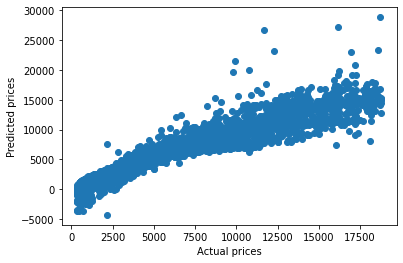

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

###8. Improving the results

In this step, we will try to improve the model by experimenting with a different algorithm. We will use RandomForestRegressor algorithm to improve our results in the below code. 

It builds a number of decision trees and combines their predictions to obtain more accurate and stable predictions. Random forests create a set of decision trees, each using a random subset of features from the training data. The predictions from each tree are then averaged to produce the final output.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")
print(f"MAPE: {mape_val:.2f}%")
print(f"MSE: {mse:.2f}")

RMSE: 521.08
R2: 0.98
MAPE: 6.52%
MSE: 271525.75


### 9. Visualise improved results

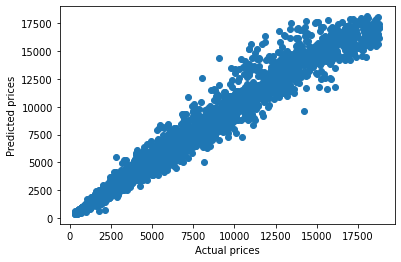

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

####Using polynomial regression to attempt to further improve results

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# train a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# make predictions on the test set
y_pred = poly_reg.predict(X_test_poly)

# calculate the mean squared error
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mape(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")
print(f"MAPE: {mape_val:.2f}%")
print(f"MSE: {mse:.2f}")

RMSE: 1463.27
R2: 0.86
MAPE: 16.24%
MSE: 2141146.17


###10. Interpretation of the results
Random Forest Regression reduced the MSE from 1,215,093 to 271,585. and the MAPE reduced from a undesirable 37.94% to a fairly good 6.52%. Same for the R squared values; from a undesirable 0.92 to a decent 0.98. 

The attempt to use 2nd order polynomial regression did not improve the results. The dataset is too large to apply a higher order polynomial regression.(to my knowledge) 

The model is fairly good at prediciting price of diamond with the relevant data.
